In [45]:
import pandas as pd
import re
import string
from transformers import pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.corpus import words

In [46]:
hanifnoerr = "hanifnoerr/Fine-tuned-Indonesian-Sentiment-Classifier"
hanifnoerr_model = pipeline(
    "sentiment-analysis",
    model=hanifnoerr,
    tokenizer=hanifnoerr,
    truncation=True,
     max_length=512
)
def analyze_sentiment_hanifnoerr(text):
    try:
        result = hanifnoerr_model(str(text))[0]
        return result['label'], result['score']
    except:
        return 'error', 'error'

crypter70 = "crypter70/IndoBERT-Sentiment-Analysis"
crypter70_model = pipeline(
    "sentiment-analysis",
    model=crypter70,
    tokenizer=crypter70,
    truncation=True,
     max_length=512
)
def analyze_sentiment_crypter70(text):
    try:
        result = crypter70_model(str(text))[0]
        return result['label'], result['score']
    except:
        return 'error', 'error'

w11wo = "w11wo/indonesian-roberta-base-sentiment-classifier"
w11wo_model = pipeline(
    "sentiment-analysis",
    model=w11wo,
    tokenizer=w11wo,
    truncation=True,
     max_length=512
)
def analyze_sentiment_w11wo(text):
    try:
        result = w11wo_model(str(text))[0]
        return result['label'], result['score']
    except:
        return 'error', 'error'

ayameRushia = "ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa"
ayameRushia_model = pipeline(
    "sentiment-analysis",
    model=ayameRushia,
    tokenizer=ayameRushia,
    truncation=True,
     max_length=512
)
def analyze_sentiment_ayameRushia(text):
    try:
        result = ayameRushia_model(str(text))[0]
        return result['label'], result['score']
    except:
        return 'error', 'error'

Aardiiiiy = "Aardiiiiy/indobertweet-base-Indonesian-sentiment-analysis"
Aardiiiiy_model = pipeline(
    "sentiment-analysis",
    model=Aardiiiiy,
    tokenizer=Aardiiiiy,
    truncation=True,
     max_length=512
)
def analyze_sentiment_Aardiiiiy(text):
    try:
        result = Aardiiiiy_model(str(text))[0]
        return result['label'], result['score']
    except:
        return 'error', 'error'

Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu


CLEANING

In [47]:
data = pd.read_csv("Review KCU Pulau Jawa - with label.csv")
data = data.dropna(subset=['review_text'])

data['review_text_cleaned'] = data['review_text'].astype(str).str.lower()
data['review_text_cleaned'] = [re.sub(r'[^\x00-\x7f]',r'', i) for i in data['review_text_cleaned']]
data['review_text_cleaned'] = [re.sub(r'\n', r' ', i) for i in data['review_text_cleaned']]
data['review_text_cleaned'] = data['review_text_cleaned'].apply(
    lambda x: re.sub(f"[{re.escape(string.punctuation)}]", " ", x)
)
# Remove numbers
data['review_text_cleaned'] = data['review_text_cleaned'].apply(lambda x: re.sub(r'\d+', '', x))

# Remove English words (basic filtering using a set of common English words)
nltk.download('words')
english_words = set(words.words())

def remove_english_words(text):
    return ' '.join([word for word in text.split() if word not in english_words])

data['review_text_cleaned'] = data['review_text_cleaned'].apply(remove_english_words)

# Normalize whitespace again after filtering
data['review_text_cleaned'] = data['review_text_cleaned'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Drop empty rows again
data = data[data['review_text_cleaned'] != ""]

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\POS\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [48]:
words_dict = {'tdk': 'tidak','yg' : 'yang','ga' : 'tidak',
'gak' : 'tidak','d' : 'di','sy' : 'saya','&' : 'dan','dgn' : 'dengan',
'utk' : 'untuk','gk' : 'tidak','jd' : 'jadi','jg' : 'juga','dr' : 'dari','krn' : 'karena',
'aja' : 'saja','karna' : 'karena','udah' : 'sudah','kmr' : 'kamar','g' : 'tidak','dpt' : 'dapat','banget' : 'sekali',
'bgt' : 'sekali','kalo' : 'kalau','n' : 'dan', 'bs' : 'bisa','oke' : 'bagus','dg' : 'dengan','pake' : 'pakai',
'sampe' : 'sampai','dapet' : 'dapat','ad' : 'ada','lg' : 'lagi','bikin' : 'buat','tak' : 'tidak',
'ny' : 'nya','ngga' : 'tidak','nunggu' : 'tunggu','klo' : 'kalau','blm' : 'belum','trus' : 'terus',
'kayak' : 'seperti','dlm' : 'dalam','udh' : 'sudah','tau' : 'tahu','org' : 'orang','hrs' : 'harus','msh' : 'masih',
'sm' : 'sama','byk' : 'banyak','krg' : 'kurang','kmar' : 'kamar','spt' : 'seperti','pdhl' : 'padahal','chek' : 'cek',
' dteng2' : 'datang-datang','pesen' : 'pesan', 'kran' : 'keran','gitu' : 'begitu','tpi' : 'tetapi',
'tapi':'tetapi,','lbh' : 'lebih','tmpt' : 'tempat','dikasi' : 'dikasih','serem' : 'seram', 'sya' : 'saya',
'jgn' : 'jangan','dri' : 'dari','dtg' : 'datang','gada' : 'tidak ada','standart' : 'standar','mlm' : 'malam','k'  : 'ke','kl' : 'kalau','sgt': 'sangat','y' : 'ya','krna' : 'karena','tgl' : 'tanggal', 'terimakasih' : 'terima kasih','kecoak' : 'kecoa','pd' : 'pada','tdr' : 'tidur', 'jdi' : 'jadi','kyk' : 'seperti','sdh' : 'sudah','ama' : 'sama','gmana' : 'bagaimana','dalem' : 'dalam','tanyak' : 'tanya','taru' : 'taruh','gede' : 'besar','kaya' : 'seperti','access' : 'akses','tetep' : 'tetap','mgkin' : 'mungkin','sower' : 'shower','idup' : 'hidup','nyaaa' : 'nya','baikk' : 'baik','hanay' : 'hanya','tlp' : 'telpon','kluarga' : 'keluarga','jln' : 'jalan','hr' : 'hari','ngak' : 'tidak','bli' : 'beli','kmar' : 'kamar','naro' : 'taruh','telpon':'telepon','nlpn':'telepon','tlp':'telepon','nelpon':'telepon','ktr':'kantor','kntr':'kantor','cb' : 'coba','bgs' : 'bagus','mntp' : 'mantap','jlk' : 'jelek','smp' : 'sampai','ane' : 'saya','gw' : 'saya','gua' : 'saya','dah' : 'sudah',"jelek.": "jelek","dioper": "dioper","lntai3": "lantai 3","1lagi": "1 lagi","lembaga pemerintag": "lembaga pemerintah","payah.": "payah","reformasi": "Reformasi","paket": "paketnya","blum": "belum","dpt": "dapat","pki": "pakai","knp": "kenapa","smpai": "sampai","lmbat": "lambat","dijakarta": "di Jakarta","kerjanya": "kerjanya","cust": "customer","servis": "service","konco": "kawan","ga": "nggak","Emang": "Memang","Gk": "Nggak","Gmn": "Gimana","kl": "kalau","dr": "dari","rmh": "rumah","krj": "kerja","sm": "sama","sdh": "sudah","pd": "pada","jg": "juga","br": "baru","bs": "bisa","hr": "hari","sy": "saya","kt": "kita","ato": "atau","map": "map coklat","coklat": "coklat","blm": "belum","sn": "sana","yg": "yang","payanan": "pelayanan","pertimbanhkan": "pertimbangkan","telfon": "telepon","kagak": "nggak","tlp": "telepon","bodo": "bodoh","bnyak": "banyak","internet": "internetnya","m": "mempermudah","g": "nggak","brp": "berapa","drpd": "daripada","brt": "berat","tlpn": "telepon","alamatnya": "alamat","ngga": "nggak","mentang": "mentang-mentang","sumardi": "Sumardi","tuan": "Tuan","operator e": "operatornya","kedubrak": "Kedodoran","exspress": "express","perna": "pernah","payahhhhh.": "payah","cs": "customer service","tidakdapat": "tidak dapat","ny": "nya","pt.posindonesia": "pt. pos indonesia","krm": "kirim","spt": "seperti","kntr": "kantor","posindonesia": "pos indonesia","nyuruh": "menyuruh","yasudah": "ya sudah","saya bilang": "saya berkata","tasikmlaya": "tasikmalaya","jwb": "jawab","mdl": "modal","tdi": "tadi","seprti": "seperti","tdk": "tidak","telfn": "telepon","no": "nomor","mga": "semoga","negata": "negara","proaea": "proses","ka tor pos": "kantor pos","sms": "saya","mag": "melalui","fb": "facebook","dlm": "dalam","syr": "saya","benerin": "benar","Timur": "timur","indoanesia": "indonesia","Posgiro": "Pos Giro","utang": "utang","ambill": "ambil","bsknyanya": "besoknya","keesookan": "keesokan","ujung2nya": "ujung-ujungnya","ngejawaab": "menjawab","kostumer": "customer","custemer": "customer","ditoellpn": "ditelpon","pengantaran": "pengantaran","hppp": "hape","mgunakan": "menggunakan","perlune": "perlu",
"smp": "sampai","telpon": "telepon","knp": "kenapa","bgt": "banget","gak": "tidak","ga": "tidak","blm": "belum","skrng": "sekarang","aja": "saja","udh": "sudah","smpai": "sampai","malaes": "males","ngantar": "mengantar","yg": "yang","3hari": "tiga hari","tmpat": "tempat","kesitu": "ke situ","beangnya": "biayanya","skali": "sekali","telp": "telepon","lum": "belum","tgl": "tanggal","dibilang": "dikatakan","cma": "cuma","mw": "mau","jd": "jadi","jgn": "jangan","dr": "dari","sya": "saya","ape": "apa","resek": "rese","ngga": "tidak","klo": "kalau","bakalan": "akan","ky": "kayak","krn": "karena","sth": "setelah","nyampe": "sampai","d": "di","simten": "sistem","d tanggapi": "ditanggapi","2minggu": "dua minggu","2bln": "dua bulan","bikin": "membuat","msih": "masih","sm": "sama","smpe": "sampai","blom": "belum","lah": "saja","sampe": "sampai","dteng": "datang","dn": "dan","dtrima": "diterima","ats": "atas","nma": "nama","nm": "nama","tlfon": "telepon","d angkat": "diangkat","slh": "salah","ato": "atau","kcewa": "kecewa","cek": "periksa","gk": "tidak","anter": "antar","di anter": "diantar","di tahan2": "ditahan-tahan","giliran": "ketika","ngambil": "mengambil","koq": "kok","skarang": "sekarang","seh": "sih","Endonesah": "Indonesia","smpe2": "sampai-sampai","ngendep": "mengendap","pdhl": "padahal","dkt": "dekat","Telfon": "Telepon","lbh": "lebih","di retur": "diretur","di antar2": "diantar-antar","tlpon": "telepon","sprt": "seperti","dri": "dari","sdah": "sudah","sminggu": "seminggu","lbih": "lebih","smpt": "sempat","sayamalah": "saya malah","dkembalikan": "dikembalikan","brng": "barang","brp": "berapa","poa": "pos","ktne": "katanya","brg": "barang","eksoedisi": "ekspedisi","nggak": "tidak","tlg": "tolong","ajh": "aja","mislkan": "misalkan","trmksh": "terima kasih","sampek": "sampai","gabisa": "tidak bisa","tdk": "tidak","WU": "Western Union","gnya": "tidak-nya","dipelayanan": "di pelayanan","dibelakng": "di belakang","g": "tidak","bknya": "bukannya","cs": "customer service","sby": "Surabaya","ktnya": "katanya","pengirimin": "pengiriman","sloooww": "slow","berbelit\"": "berbelit-belit","dtng": "datang","gw": "saya","ampe": "sampai","bsok": "besok","goblokk": "goblok","bangeeet": "banget","yaudah": "ya sudah","kerjanya": "kerja nya","gniat": "tidak niat","kenkantornya": "ke kantornya","gni": "begini","ampas": "buruk","gedor2": "gedor-gedor","klakson2": "klakson-klakson","di anter2": "diantar-antar","bngt": "banget","pket": "paket","tlp": "telepon","dtelpon": "ditelepon","didiemin": "dibiarkan"," nya": "nya","kl": "kalau","bsk": "besok","di tlp": "ditelepon","sbnrnya": "sebenarnya","cust": "customer","custemer": "customer","brang": "barang","lmpung": "lampung","dtuju": "dituju","dteruskan": "diteruskan","pk": "pakai","mudik": "pulang kampung","kerumah": "ke rumah","maketin": "mengirimkan","ngapalin": "menghapal","trs": "terus","ny": "nya","dikirimnya": "dikirim","kmrin": "kemarin","kmrn": "kemarin","gausah": "tidak usah","gaakan": "tidak akan","pake": "pakai","kenk": "ke","bru": "baru","byaar": "bayar","brgnya": "barangnya","bsa": "bisa","jng": "jangan","bnyak": "banyak","sy": "saya","dt": "datang","res": "resi","gmna": "bagaimana","bkin": "bikin","mkn": "makan","bnr2": "benar-benar","pliz": "please","kapok": "jerah","ngendon": "mengendap","cus": "customer","mnding": "mending","dgn": "dengan","kirimnya": "dikirim","neng": "adik","cepet": "cepat","dkirim": "dikirim","kirimny": "pengirimannya","mlah": "malah","kiriman": "paket","sb": "sudah","tnggl": "tanggal","trnyata": "ternyata","bln": "bulan","dktr": "dekat","sni": "sini","km": "kamu","lo": "kamu","smua": "semua","kmna": "ke mana","tln": "tolong","dkirim2": "dikirim-kirim","kjra": "kerja","sbnr": "sebenar","masi": "masih","btul": "betul","mlm": "malam","kmren": "kemarin","dtruskan": "diteruskan","yng": "yang","pakrt": "paket","mnt": "minta","pelayananx": "pelayanannya","barng": "barang","skr": "sekarang","jg": "juga","ktanya": "katanya","dhlm": "dalam","komplen": "komplain","negri": "negeri","nmr": "nomor","na": "nya","pmbyrn": "pembayaran","dkasih": "diberikan","antebin": "diabaikan","kga": "tidak","pryanan": "pelayanan","tidk": "tidak","ccd": "cacat","ngentddd": "ngentot","dkembalikn": "dikembalikan","trlebih": "terlebih","d-sms": "di-sms","telfon": "telepon","nyampenny": "sampainya","gue": "saya",
"aj": "saja","didiemin": "dibiarkan","gue": "saya","bngt": "banget","klo": "kalau","kmana": "ke mana","udah": "sudah","mao": "mau","gimana": "bagaimana","dibilang": "dikatakan","kpn": "kapan","nih": "ini","gw": "saya","ngapaen": "ngapain","kalaw": "kalau","kg": "tidak","dksh": "dikasih","no": "nomor","lembr": "lembar","cuman": "hanya","pdhl": "padahal","bkin": "bikin","ampe": "sampai","pmbyrn": "pembayaran","si": "sih","bgt": "banget","dkasi": "diberi","trus": "terus","loketnya": "loketnya","yng": "yang","ga": "tidak","gk": "tidak","g": "tidak","gt": "tidak","ni": "ini","ktr": "kantor","resi": "resi","blm": "belum","sampe": "sampai","udh": "sudah","pdhal": "padahal","dr": "dari","bakalan": "akan","batalin": "batalkan","telpon": "telepon","ditelpon": "ditelepon","diteleponin": "ditelepon","parahhh": "parah","bangat": "banget","dtelponin": "ditelepon","blum": "belum","smpe": "sampai","swtiap": "setiap","hadeuhh": "hadeuh","kevewa": "kecewa","jwab": "jawab","astaghfirullah": "astaghfirullah","bgst": "bangsat","dijawab": "dijawab","gaada": "tidak ada","masak": "masa","alesannya": "alasannya","gak": "tidak","gimana deh": "bagaimana","haha": "ha-ha","coi": "coy","digeletakin": "digeletakkan","jutek-jutek": "jutek","ambyarr": "ambyar","yaampun": "ya ampun","sma": "sama","aza": "saja","bsa": "bisa","kerja lelet": "kerjanya lambat","ngga": "tidak","ga bagus": "tidak bagus","gak sampai2": "tidak sampai-sampai","pwt": "purwokerto","pbg": "pekalongan","mksudnya": "maksudnya","mbok": "sebaiknya","trs": "terus","smua": "semua","makanya": "maka dari itu","ja": "saja","brat": "banget","amit amit": "amit-amit","sani": "sana","di tlp": "ditelepon","loh": "lho","kapokk": "kapok","lelet": "lambat","susah dihubungi": "sulit dihubungi","enggak": "tidak","engk": "tidak","someday": "nanti","lha": "lah","ga nyampe": "tidak sampai","nyampenya": "sampainya","paketan": "paket","alamatnya": "alamat","alamatnya ga lengkap": "alamat tidak lengkap","pelayananya": "pelayanannya","alamat ga lengkap": "alamat tidak lengkap","alamat gak lengkap": "alamat tidak lengkap","pelayanannya ga jelas": "pelayanannya tidak jelas","pelayanan buruk": "pelayanannya buruk","parahhhh": "parah","pelayanan jelek": "pelayanannya buruk","tai": "buruk","tai kucing": "sangat buruk","mbanya": "mbaknya","ga ngenakin": "tidak mengenakkan","kaya": "seperti","custumer": "customer","kaya driver2": "seperti para driver","nulis nama": "menulis nama","parah banget": "sangat parah","makin ngawur": "semakin kacau","tdk": "tidak","ga ada": "tidak ada","pelayanannya buruk": "pelayanannya buruk","lbh": "lebih","mandi keringet": "berkeringat","pelayanan nya": "pelayanannya","ngirim": "mengirim","gini": "begini","gak mau": "tidak mau","loket hantu": "loket kosong","pake": "pakai","pelayanan prima": "layanan prima","kapan": "sejak kapan","nyantol": "terhenti","berhari²": "berhari-hari","yng": "yang","udh": "sudah","ga": "tidak","g": "tidak","jg": "juga","smpe": "sampai","smp": "sampai","td": "tadi","tlp": "telepon","ditlp": "ditelepon","klo": "kalau","pki": "pakai","dr": "dari","smpai": "sampai","aja": "saja","jd": "jadi","bgt": "banget","bgtu": "begitu","dpt": "dapat","kmren": "kemarin","blm": "belum","dkrim": "dikirim","dhl": "padahal","dgn": "dengan","tdk": "tidak","lgsg": "langsung","pdhl": "padahal","nyampe": "sampai","pda": "pada","sy": "saya","bkin": "bikin","trs": "terus","smrg": "semarang","mlng": "malang","sm": "sama","ny": "nya","bln": "bulan","gmna": "bagaimana","cuma": "hanya","nggak": "tidak","grgr": "gara-gara","dhhbungi": "dihubungi","gk": "tidak","sma": "sama","kaga": "tidak","perna": "pernah","pelayananya": "pelayanannya","nmr": "nomor","bbrp": "beberapa","bkn": "bukan","pn": "pun","materii": "materai","cuiuui": "cukup","mater": "maret","trma": "terima","bknya": "bukannya","truss": "terus","anu": "itu","ono": "itu","tau": "tahu","lho": "loh","mpospay": "pospay","trimakasih": "terima kasih","bnyk": "banyak","lagi2": "lagi-lagi","nggk": "tidak","sampek": "sampai","ne": "ini","yg": "yang","ki": "ini","opo": "apa","taukah": "tahu kah","lgi": "lagi","lg": "lagi","kaya": "seperti","mls": "malas","dateng2": "datang-datang","kurirny": "kurirnya","seenggaknya": "setidaknya","dong": "lah","kuyup": "basah","cs": "customer service","info": "informasi","staff": "staf","pasien": "kesabaran","mengerikan": "buruk","jga": "juga","dh": "sudah","lemot": "lambat","gw": "saya","sampe2": "sampai-sampai","blom": "belum","d": "di","sampe": "sampai","pdahal": "padahal","hadeuhhh": "aduh","padhl": "padahal","aturankan": "aturannya","gimana": "bagaimana","nanyain": "menanyakan","gaada": "tidak ada","menau": "mengetahui","belom": "belum","nanya": "bertanya","donk": "dong","sibuk": "sedang sibuk","ekspedisi": "jasa kirim","costumer": "customer","songong": "sombong","madih": "masih","ngga": "tidak","knpa": "kenapa","tlpn": "telepon","lha": "lah","asw": "anjing","oy": "hei","kirim": "mengirim","ngecek": "memeriksa","blagak": "berlagak","doank": "saja","kucuk": "berjalan pelan","dah": "sudah","anjir": "waduh","lhh": "lah","gx": "tidak","pak": "bapak","bu": "ibu","pake": "pakai","nexday": "next day","perbaikilh": "perbaikilah","jngn": "jangan","kecewakn": "mengecewakan","dimna": "di mana","tsb": "tersebut","ngepos": "mengirim","mba2": "mbak-mbak","bapak2": "bapak-bapak","amburadul": "kacau","custumor": "customer","trening": "training","keblakang": "ke belakang","sequrity": "security","myenangkann": "menyenangkan","pek": "paket","aoa": "apa","buble": "bubble","ekpresi": "ekspresi","capeknya": "kelelahannya","malih": "lagi","noll": "nol","dikit": "sedikit"
}

list_sentence_train = []
for sentence in data['review_text_cleaned'] :
    cleaned_sentence = [words_dict[word] if word in list(words_dict.keys()) else word for word in sentence.split()]
    list_sentence_train.append(' '.join(cleaned_sentence))
data['review_text_cleaned'] = list_sentence_train

In [49]:
# stop_words = [
#     'yang', 'dan', 'di', 'ke', 'dari', 'ini', 'untuk', 'dengan', 'pada', 'juga',
#     'sebagai', 'karena', 'saat', 'adalah', 'itu', 'dalam', 'tidak', 'akan', 'atau', 'agar',
#     'bagi', 'maupun', 'lebih', 'telah', 'para', 'namun', 'sudah', 'masih', 'setelah', 'harus',
#     'bisa', 'dapat', 'tanpa', 'hingga', 'selama', 'sejak', 'sebelum', 'sesudah', 'antara',
#     'tentang', 'demi', 'bahwa', 'supaya', 'adapun', 'terhadap', 'kepada', 'aku', 'saya',
#     'kamu', 'dia', 'mereka', 'kami', 'kita', 'engkau', 'nya', 'mu', 'ku', 'kau', 'lah', 'pun',
#     'hanya', 'saja', 'kalau', 'begitu', 'maka', 'jadi', 'sambil', 'serta',
#     'seperti', 'yaitu', 'yakni', 'hingga', 'sementara', 'misalnya', 'barangkali', 'melainkan',
#     'padahal', 'sebab', 'alhasil', 'justru', 'namanya', 'kecuali', 'bahkan', 'punya',
#     'bukan', 'ya', 'eh', 'oh', 'nah', 'ok', 'oke', 'nah', 'emang', 'dong', 'deh', 'kan', 'toh',
#     'gak', 'nggak', 'tidak', 'enggak', 'udah', 'udah', 'aja', 'cuma', 'doang', 'biar',
#     'malah', 'kayak', 'gitu', 'gini', 'nih', 'loh', 'siapa', 'apa', 'mana', 'berapa', 'kenapa',
#     'mengapa', 'kapan', 'dalamnya', 'beserta', 'termasuk', 'buat', 'bentuk', 'oleh', 'berikut',
#     'lalu', 'tapi', 'tetapi', 'pernah', 'hingga', 'jika', 'seandainya', 'anda', 'waktu', 'mau',
#     'sedang', 'lagi', 'bila', 'misal', 'contoh', 'terus', 'seolah', 'seakan','menurut', 'dua', 'ia', 
#     'sehingga', 'kembali', 'sekitar', 'hal','ketika', 'ada', 'secara', 'lain', 'daripada', 'itulah',
#     'dimana', 'kemana', 'pula', 'guna', 'kah', 'sampai','sedangkan', 'selagi', 'apakah', 'selain', 'seraya', 
#     'agak', 'boleh', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian',
#     'ingin',  'mari', 'nanti', 'seharusnya', 'sebetulnya','seterusnya',
#     'setiap', 'setidaknya', 'sesuatu', 'pasti', 'walau', 'tolong', 'tentu', 'amat',
#     'apalagi', 'bagaimanapun', 'sekali','masa'
# ]
# keep_stopwords = ['tidak', 'belum', 'kurang','tetapi', 'kecuali']
# fix_stopwords = [word for word in stop_words if word not in keep_stopwords]

# # Remove stopwords and clean text
# data['review_text_cleaned'] = data['review_text_cleaned'].apply(
#     lambda text: ' '.join([word for word in text.split() if word not in fix_stopwords]).strip()
# )

# # Replace empty strings with NaN
# data['review_text_cleaned'].replace('', pd.NA, inplace=True)

# # Drop rows where cleaned text is NaN
# data.dropna(subset=['review_text_cleaned'], inplace=True)

In [50]:
# # create stemmer
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# # apply stemming
# def safe_stem(text):
#     try:
#         return stemmer.stem(text)
#     except:
#         return 'error'

# data['review_text_cleaned'] = data['review_text_cleaned'].apply(safe_stem)

HANIFNOERR

In [51]:
data[['sentiment_result_hanifnoerr', 'score_sentiment_result_hanifnoerr']] = data['review_text_cleaned'].apply(
    lambda x: pd.Series(analyze_sentiment_hanifnoerr(x))
)
print(data['sentiment_result_hanifnoerr'].value_counts())

sentiment_result_hanifnoerr
negative    327
positive    296
neutral     167
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_35936\1922892403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_hanifnoerr', order=data['sentiment_result_hanifnoerr'].value_counts().index, palette='pastel')


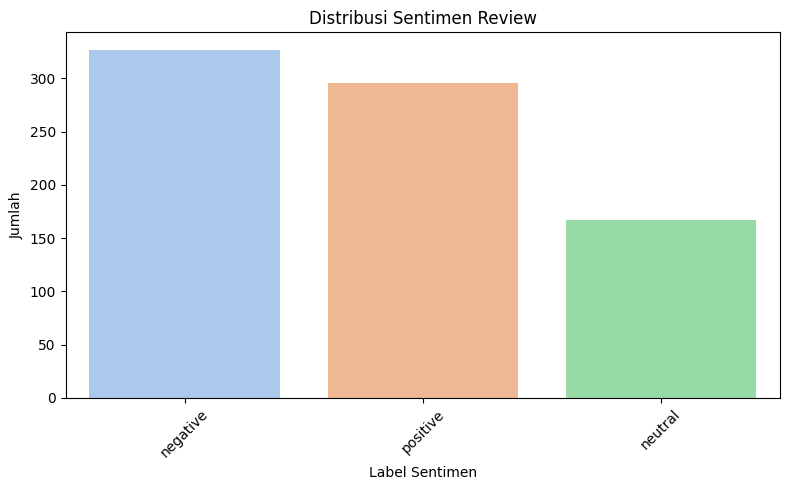

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_hanifnoerr', order=data['sentiment_result_hanifnoerr'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

crypter70

In [53]:
data[['sentiment_result_crypter70', 'score_sentiment_result_crypter70']] = data['review_text_cleaned'].apply(
    lambda x: pd.Series(analyze_sentiment_crypter70(x))
)
print(data['sentiment_result_crypter70'].value_counts())

sentiment_result_crypter70
NEGATIVE    317
POSITIVE    297
NEUTRAL     176
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_35936\3126681369.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_crypter70', order=data['sentiment_result_crypter70'].value_counts().index, palette='pastel')


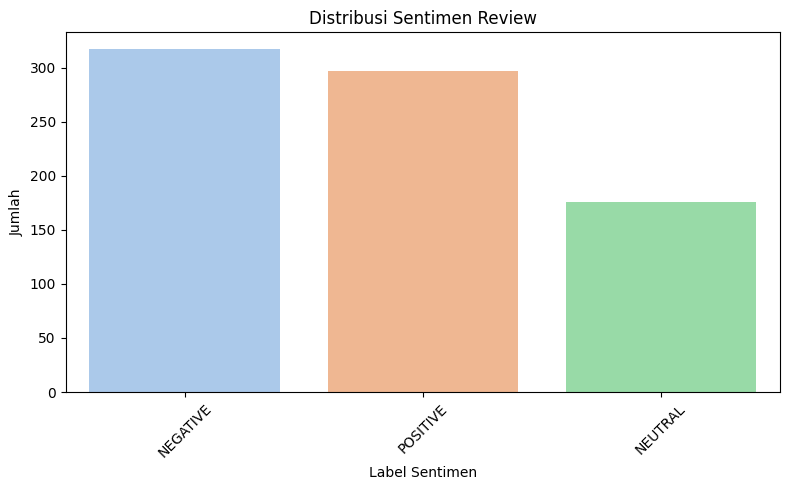

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_crypter70', order=data['sentiment_result_crypter70'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

w11wo

In [55]:
data[['sentiment_result_w11wo', 'score_sentiment_result_w11wo']] = data['review_text_cleaned'].apply(
    lambda x: pd.Series(analyze_sentiment_w11wo(x))
)
print(data['sentiment_result_w11wo'].value_counts())

sentiment_result_w11wo
positive    311
negative    304
neutral     175
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_35936\392182998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_w11wo', order=data['sentiment_result_w11wo'].value_counts().index, palette='pastel')


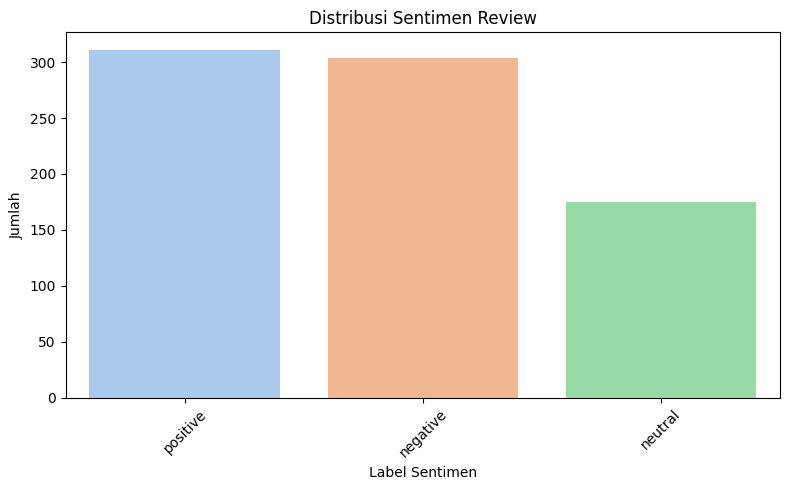

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_w11wo', order=data['sentiment_result_w11wo'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
data[['sentiment_result_ayameRushia', 'score_sentiment_result_ayameRushia']] = data['review_text_cleaned'].apply(
    lambda x: pd.Series(analyze_sentiment_ayameRushia(x))
)
print(data['sentiment_result_ayameRushia'].value_counts())

sentiment_result_ayameRushia
Negative    303
Positive    293
Neutral     194
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_35936\4168932491.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_ayameRushia', order=data['sentiment_result_ayameRushia'].value_counts().index, palette='pastel')


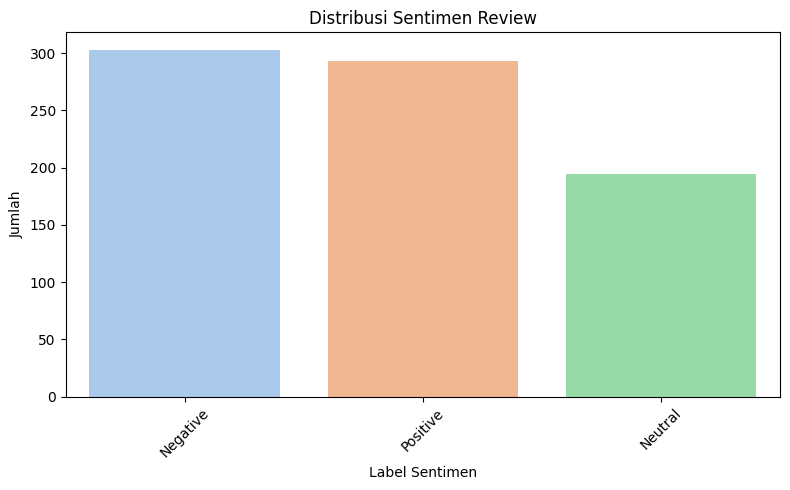

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_ayameRushia', order=data['sentiment_result_ayameRushia'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
data[['sentiment_result_Aardiiiiy', 'score_sentiment_result_Aardiiiiy']] = data['review_text_cleaned'].apply(
    lambda x: pd.Series(analyze_sentiment_Aardiiiiy(x))
)
print(data['sentiment_result_Aardiiiiy'].value_counts())

sentiment_result_Aardiiiiy
Negative    324
Neutral     246
Positive    220
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_35936\331142182.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_Aardiiiiy', order=data['sentiment_result_Aardiiiiy'].value_counts().index, palette='pastel')


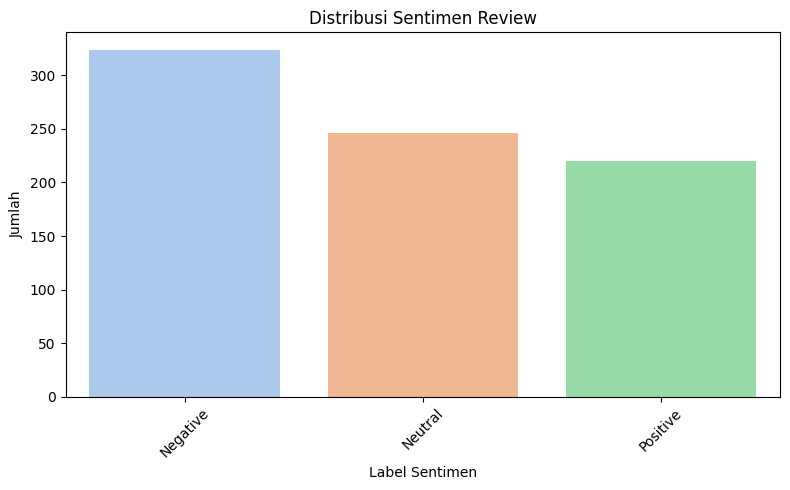

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_Aardiiiiy', order=data['sentiment_result_Aardiiiiy'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
# Update y_true and y_pred
y_true = data['sentiment']
y_pred = data['sentiment_result_hanifnoerr']

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=['positive', 'negative','neutral']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=['positive', 'negative','neutral']))


Accuracy: 83.04%

Classification Report:
              precision    recall  f1-score   support

    positive       0.91      0.81      0.86       333
    negative       0.90      0.89      0.89       331
     neutral       0.56      0.74      0.63       126

    accuracy                           0.83       790
   macro avg       0.79      0.81      0.79       790
weighted avg       0.85      0.83      0.84       790


Confusion Matrix:
[[269  20  44]
 [  7 294  30]
 [ 20  13  93]]


In [62]:
# Update y_true and y_pred
y_true = data['sentiment']
y_pred = data['sentiment_result_crypter70'].str.lower()

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=['positive', 'negative','neutral']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=['positive', 'negative','neutral']))

Accuracy: 81.27%

Classification Report:
              precision    recall  f1-score   support

    positive       0.88      0.78      0.83       333
    negative       0.90      0.86      0.88       331
     neutral       0.54      0.75      0.63       126

    accuracy                           0.81       790
   macro avg       0.77      0.80      0.78       790
weighted avg       0.83      0.81      0.82       790


Confusion Matrix:
[[261  23  49]
 [ 13 286  32]
 [ 23   8  95]]


In [63]:
# Update y_true and y_pred
y_true = data['sentiment']
y_pred = data['sentiment_result_w11wo'].str.lower()

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=['positive', 'negative','neutral']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=['positive', 'negative','neutral']))


Accuracy: 81.90%

Classification Report:
              precision    recall  f1-score   support

    positive       0.87      0.82      0.84       333
    negative       0.93      0.86      0.89       331
     neutral       0.52      0.72      0.60       126

    accuracy                           0.82       790
   macro avg       0.78      0.80      0.78       790
weighted avg       0.84      0.82      0.83       790


Confusion Matrix:
[[272  12  49]
 [ 12 284  35]
 [ 27   8  91]]


In [64]:
# Update y_true and y_pred
y_true = data['sentiment']
y_pred = data['sentiment_result_ayameRushia'].str.lower()

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=['positive', 'negative','neutral']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=['positive', 'negative','neutral']))


Accuracy: 77.59%

Classification Report:
              precision    recall  f1-score   support

    positive       0.87      0.77      0.81       333
    negative       0.89      0.82      0.85       331
     neutral       0.45      0.69      0.54       126

    accuracy                           0.78       790
   macro avg       0.74      0.76      0.74       790
weighted avg       0.81      0.78      0.79       790


Confusion Matrix:
[[255  22  56]
 [  9 271  51]
 [ 29  10  87]]


In [65]:
# Update y_true and y_pred
y_true = data['sentiment']
y_pred = data['sentiment_result_Aardiiiiy'].str.lower()

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=['positive', 'negative','neutral']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=['positive', 'negative','neutral']))


Accuracy: 78.35%

Classification Report:
              precision    recall  f1-score   support

    positive       0.97      0.64      0.77       333
    negative       0.90      0.88      0.89       331
     neutral       0.46      0.90      0.61       126

    accuracy                           0.78       790
   macro avg       0.78      0.81      0.76       790
weighted avg       0.86      0.78      0.80       790


Confusion Matrix:
[[214  23  96]
 [  4 291  36]
 [  2  10 114]]
